In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Load the dataset
df = pd.read_excel("heart_disease.xlsx")

In [60]:
# Display the first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [61]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [62]:
#Summary Statistics
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [63]:
### checking missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [64]:
df["oldpeak"].fillna(df["oldpeak"].median(), inplace=True)

In [65]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [66]:
# Convert boolean columns to integers
df = df.applymap(lambda x: 1 if x is True else 0 if x is False else x)

In [67]:
#Label Encoding
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

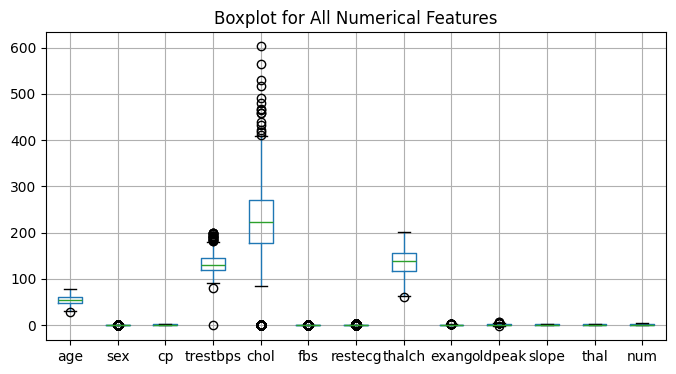

In [68]:
plt.figure(figsize=(8,4))
df.boxplot()
plt.title("Boxplot for All Numerical Features")
plt.xticks(rotation=0)
plt.show()

In [69]:
### Outlier Capping using IQR
def outlier_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR
    upper_extreme = Q3 + 1.5 * IQR
    
    df[column] = np.where(
        df[column] < lower_extreme, lower_extreme,
        np.where(df[column] > upper_extreme, upper_extreme, df[column])
    )

# Select only numeric columns (excluding target variable 'num')
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('num')

# Apply capping to each numeric column
for col in num_cols:
    outlier_capping(df, col)

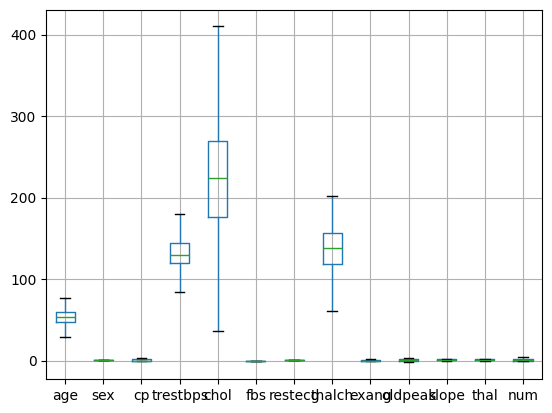

In [70]:
df.boxplot()
plt.show()

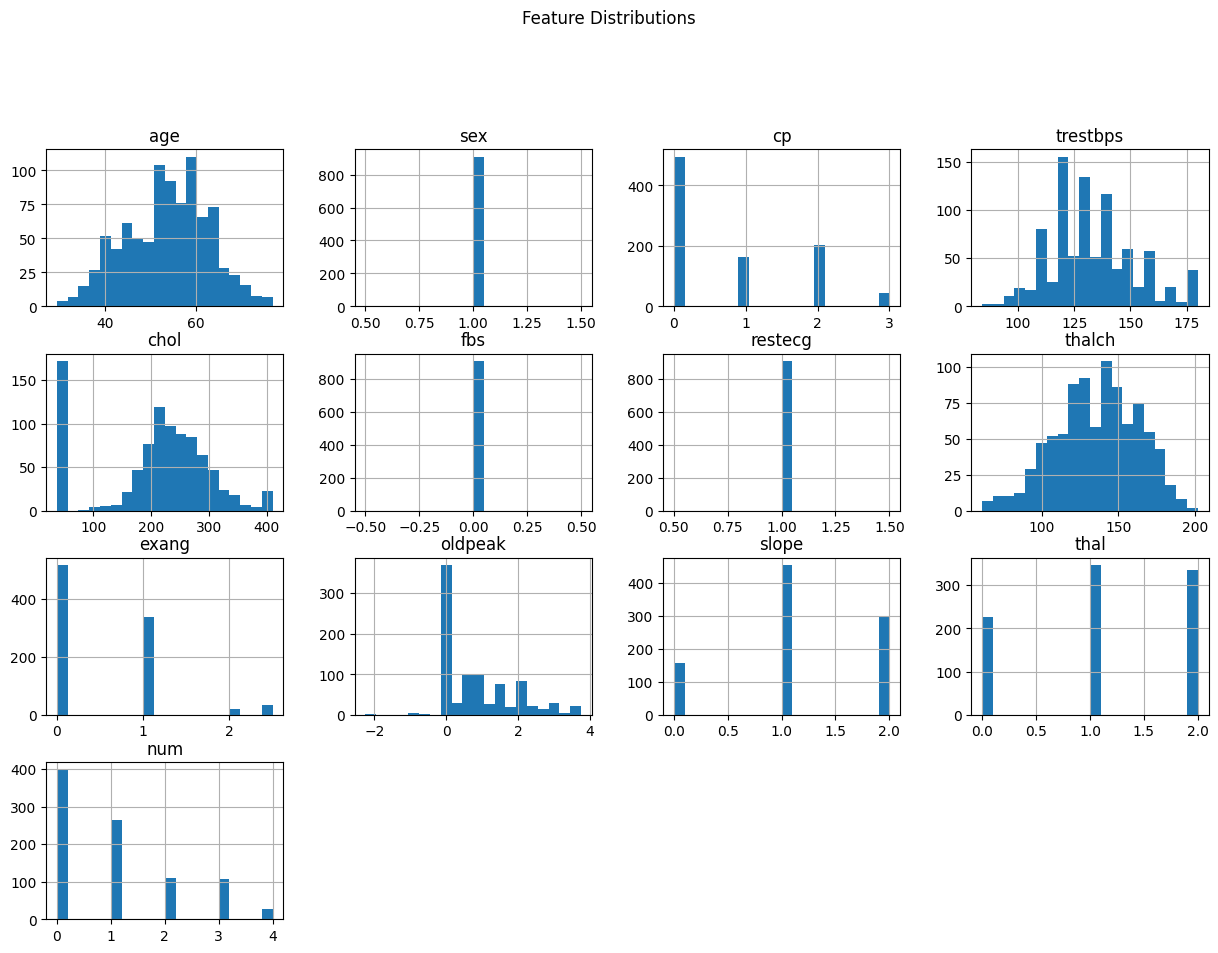

In [71]:
# Histograms
df.hist(figsize=(15,10), bins=20)
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

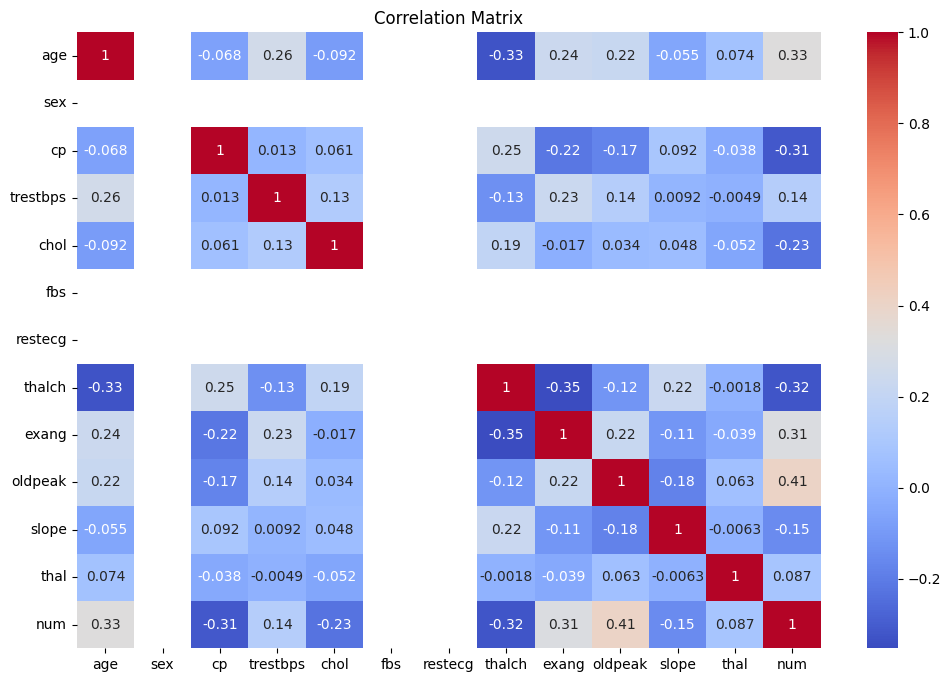

In [72]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [73]:
# Features (x) and Target (y)
x = df.drop('num', axis=1)
y = df['num']

# 80-20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)


In [74]:
# Initialize model
dt_model = DecisionTreeClassifier(random_state=40)

# Train the model
dt_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Hyperparameter Tuning

In [75]:
# Hyper-Parameter grid
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 9, 12],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

In [76]:
dt = DecisionTreeClassifier(random_state=40)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)


,estimator,DecisionTreeC...ndom_state=40)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [77]:
# Best Parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy from CV:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy from CV: 0.5620217288615966


In [78]:
#Best model
best_dt = grid_search.best_estimator_

# Predictions
y_pred_tuned = best_dt.predict(x_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

Tuned Model Accuracy: 0.5824175824175825

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.67      0.87      0.76        82
           1       0.46      0.67      0.55        52
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         7

    accuracy                           0.58       182
   macro avg       0.23      0.31      0.26       182
weighted avg       0.43      0.58      0.50       182



Model Evaluation and Analysis

In [79]:
# Best model
best_dt = grid_search.best_estimator_

# Predictions
y_pred = best_dt.predict(x_test)

In [80]:
# Accuracy
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Tuned Model Accuracy: 0.5824175824175825

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.87      0.76        82
           1       0.46      0.67      0.55        52
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         7

    accuracy                           0.58       182
   macro avg       0.23      0.31      0.26       182
weighted avg       0.43      0.58      0.50       182



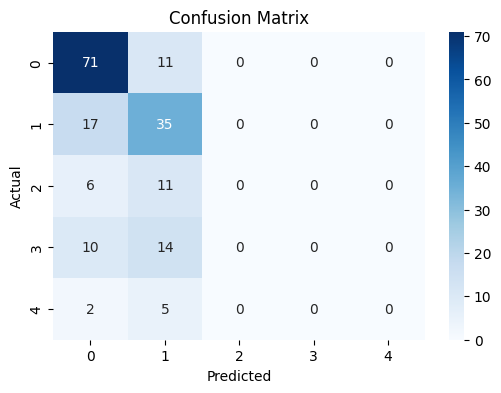

In [81]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
# ROC-AUC Score
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
y_pred_bin = label_binarize(y_pred, classes=sorted(y.unique()))
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.5873545966228892


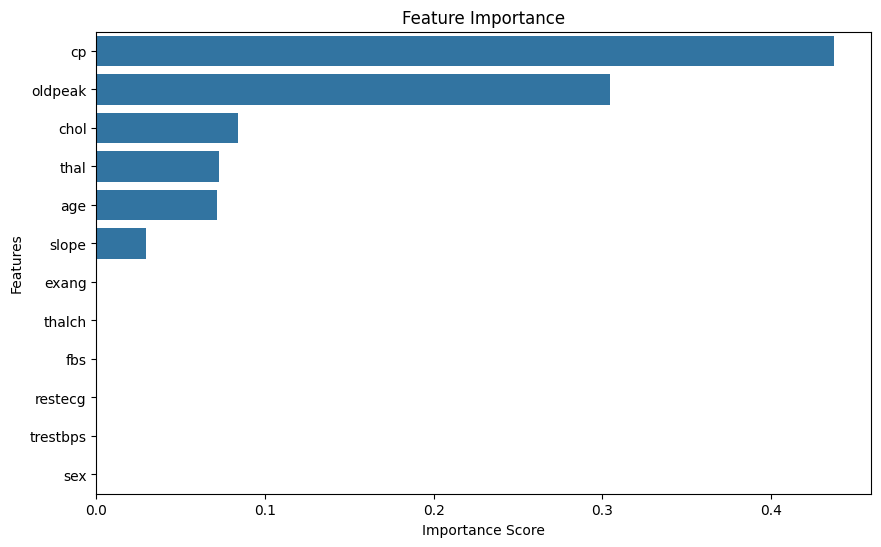

In [ ]:
# Feature Importance
feature_importances = best_dt.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[sorted_idx], y=x.columns[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

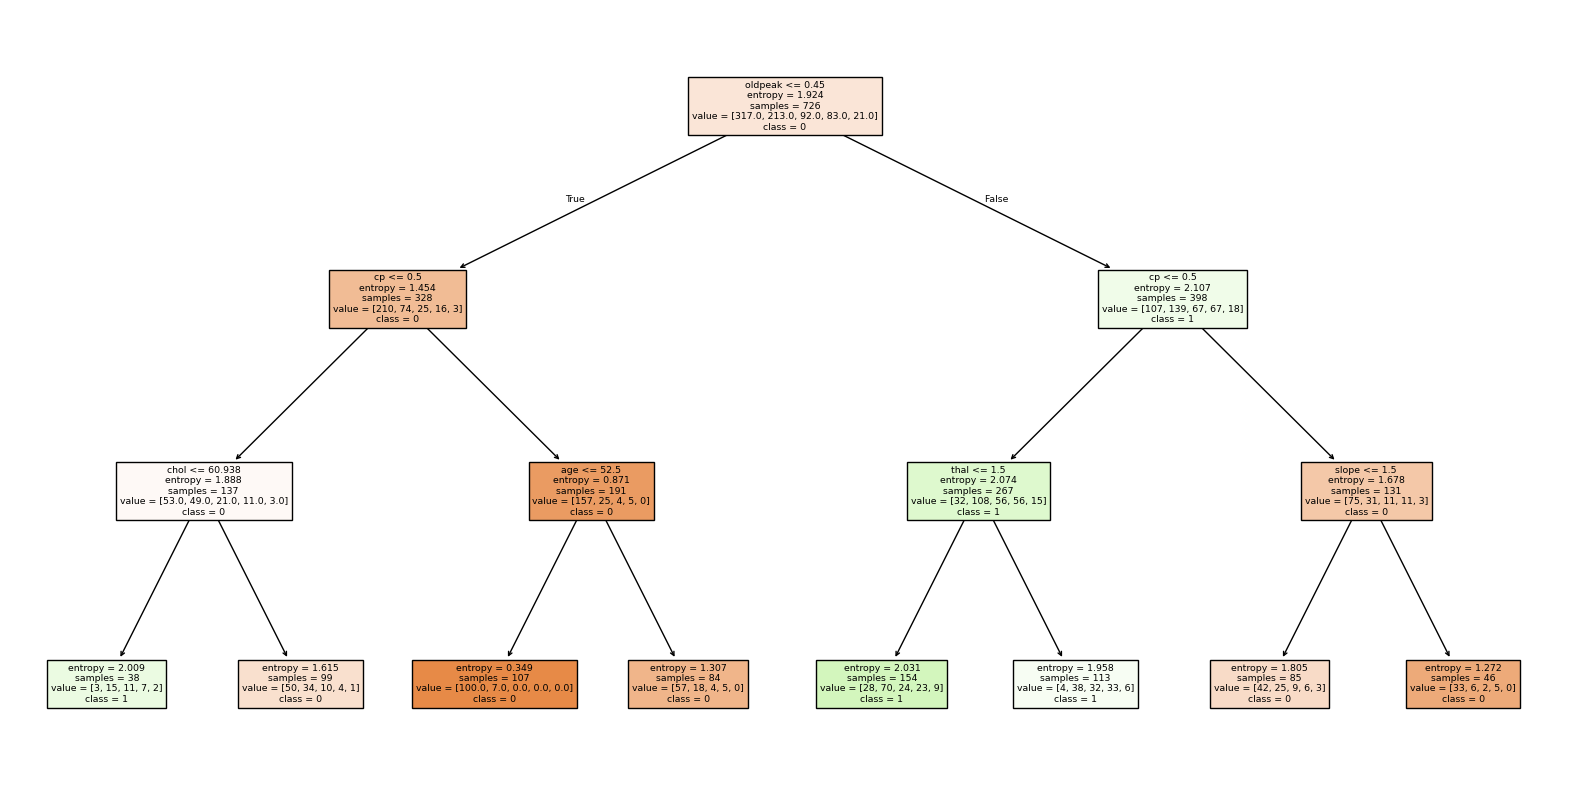

In [ ]:
#Decision Tree Visualization
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt,filled=True,feature_names=x.columns,class_names=[str(c) for c in sorted(y.unique())])
plt.show()


### **Interview Questions**

---

#### **1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

- **max_depth** – Controls how deep the tree can grow; prevents overfitting when kept small.  
- **min_samples_split** – Minimum samples needed to split a node; higher value reduces overfitting.  
- **min_samples_leaf** – Minimum samples required in leaf nodes; larger value makes the model smoother.  
- **criterion (gini / entropy)** – Determines how impurity is measured during splits.  
- **max_features** – Limits number of features considered for splits; lower values add randomness and reduce overfitting.  
- **random_state** – Ensures reproducibility of the model.

---

#### **2. What is the difference between Label Encoding and One-Hot Encoding?**

**Label Encoding**
- Converts categories into numeric labels (0, 1, 2…)
- Best for **ordinal** data
- Implies order → not suitable for nominal categories

**One-Hot Encoding**
- Creates separate binary columns for each category
- Best for **nominal** data
- Avoids ordering issue but increases feature dimensions

---
